In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import cvxpy as cvx
import time
import itertools

from matplotlib import mlab
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
import time
import os
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier

from util import *
from module_decov import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [40]:
output_folder='./10x_data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [2]:
## load data 
X,X_label,gene_name=load_10x()

In [4]:
## basic stastics calculation
X_mean=np.array(X.mean(axis=0)).flatten()
c=X.copy()
c.data**=2
X_var=np.array(c.mean(axis=0)).flatten()-X_mean**2
del c
X_cv=X_var/X_mean
X_cv[np.isnan(X_cv)]=0

/home/martin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


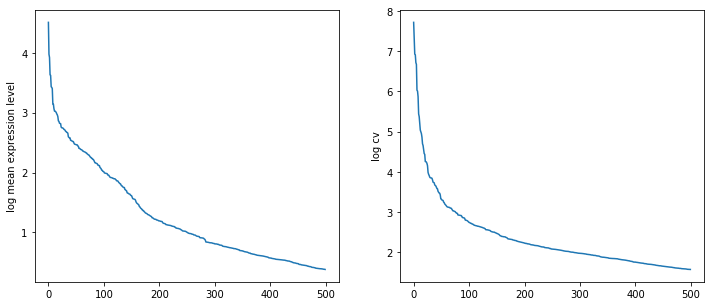

In [39]:
plt.figure(figsize=[12,5])
plt.subplot(121)
plt.plot(np.log(np.sort(X_mean)[::-1][0:500]))
plt.ylabel('log mean expression level')
plt.subplot(122)
plt.plot(np.log(np.sort(X_cv)[::-1][0:500]))
plt.ylabel('log cv')
plt.show()

In [ ]:
## extract the top 500 genes with the highest cv
idx_list=np.argsort(X_cv)
n_topgene=1000
X_dense=np.zeros([X.shape[0],n_topgene],dtype=int)
gene_name_dense=[]
for i in range(n_topgene):
    if i%10==0:
        print i
    X_dense[:,i]=np.array(X[:,idx_list[-i-1]].toarray()).flatten()
    gene_name_dense.append([gene_name[-i-1]])
np.save(output_folder+'/top_'+str(n_topgene)+'_cv',(X_dense,X_label,gene_name_dense))

0
10
20


In [51]:
## extract the top 50 genes with the highest mean
idx_list=np.argsort(X_mean)
n_topgene=50
X_dense=np.zeros([X.shape[0],n_topgene],dtype=int)
gene_name_dense=[]
for i in range(n_topgene):
    if i%10==0:
        print i
    X_dense[:,i]=np.array(X[:,idx_list[-i-1]].toarray()).flatten()
    gene_name_dense.append([gene_name[-i-1]])
np.save(output_folder+'/top_'+str(n_topgene)+'_mean',(X_dense,X_label,gene_name_dense))

0
10
20
30
40


In [ ]:
## extract the highly expressed genes
idx_list=np.argsort(X_cv)
n_topgene=1000
X_dense=np.zeros([X.shape[0],n_topgene],dtype=int)
for i in range(n_topgene):
    X_dense[:,i]=np.array(X[:,idx_list[-i-1]].toarray()).flatten()
idx_select=np.random.permutation(X_dense.shape[0])[0:20000]
X_dense_ds=X_dense[idx_select,:]
X_label_ds=X_label[idx_select]


1 million


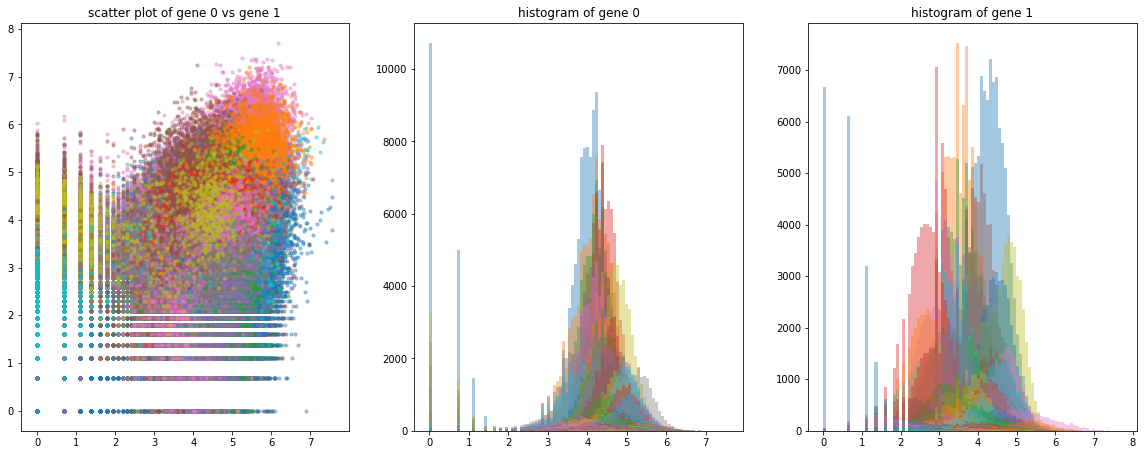

down sampled 20k


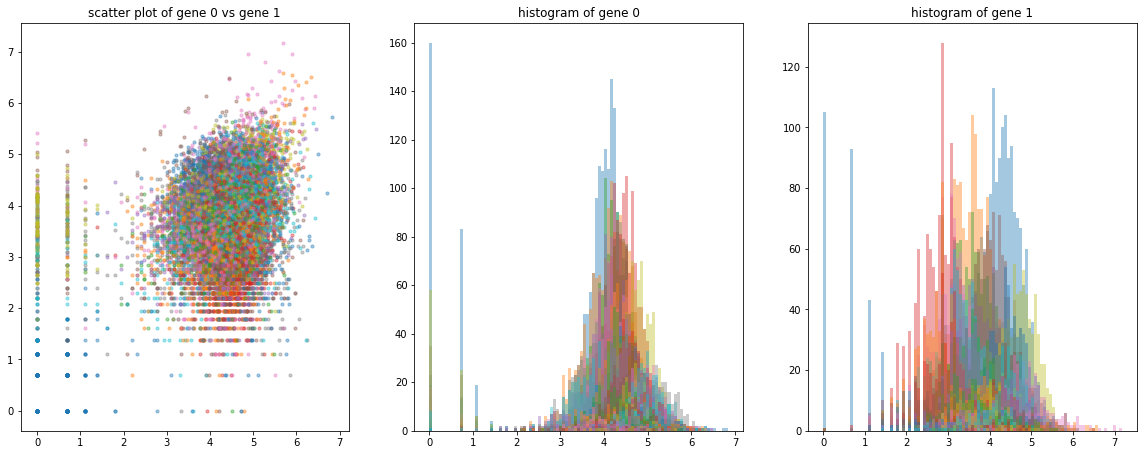

1 million


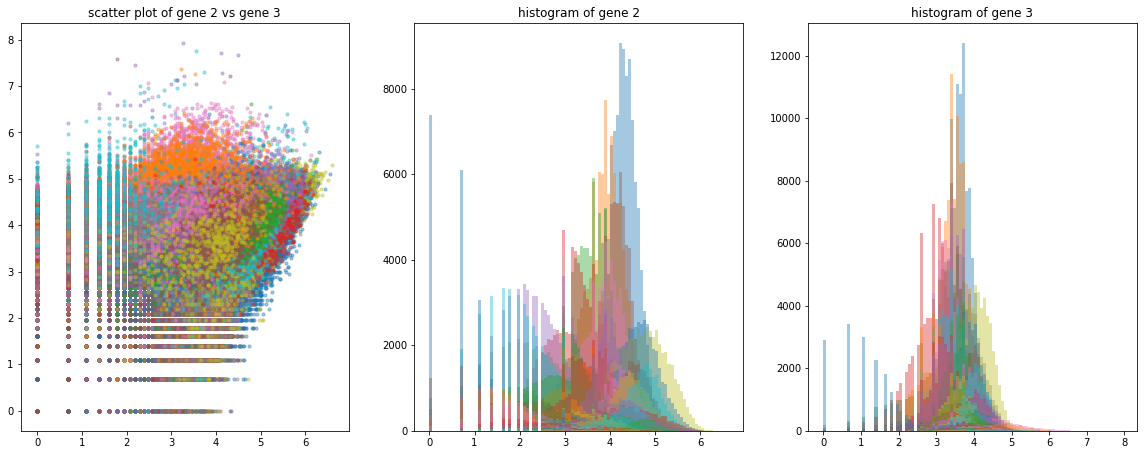

down sampled 20k


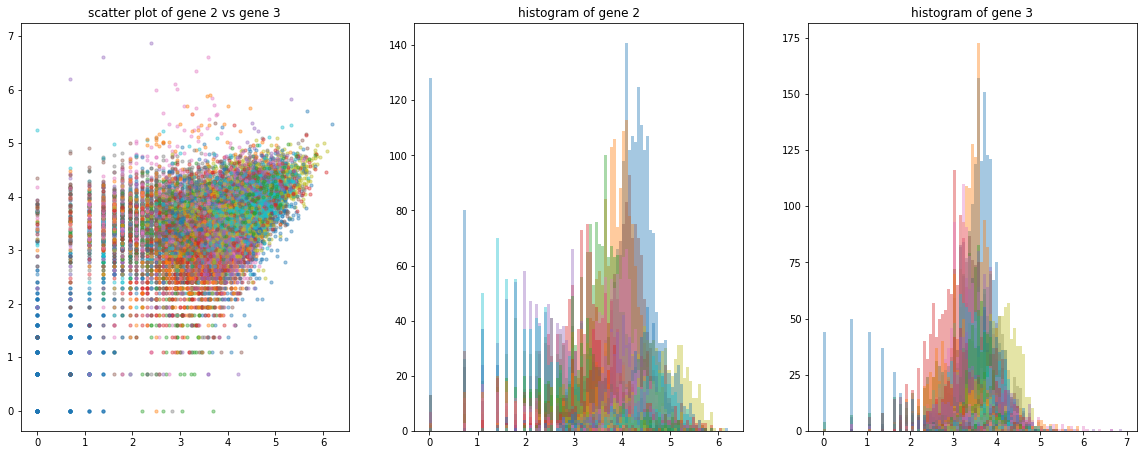

In [8]:
print '1 million'
plot_pair(np.log(X_dense+1),X_label,0,1)
print 'down sampled 20k'
plot_pair(np.log(X_dense_ds+1),X_label_ds,0,1)
print '1 million'
plot_pair(np.log(X_dense+1),X_label,2,3)
print 'down sampled 20k'
plot_pair(np.log(X_dense_ds+1),X_label_ds,2,3)

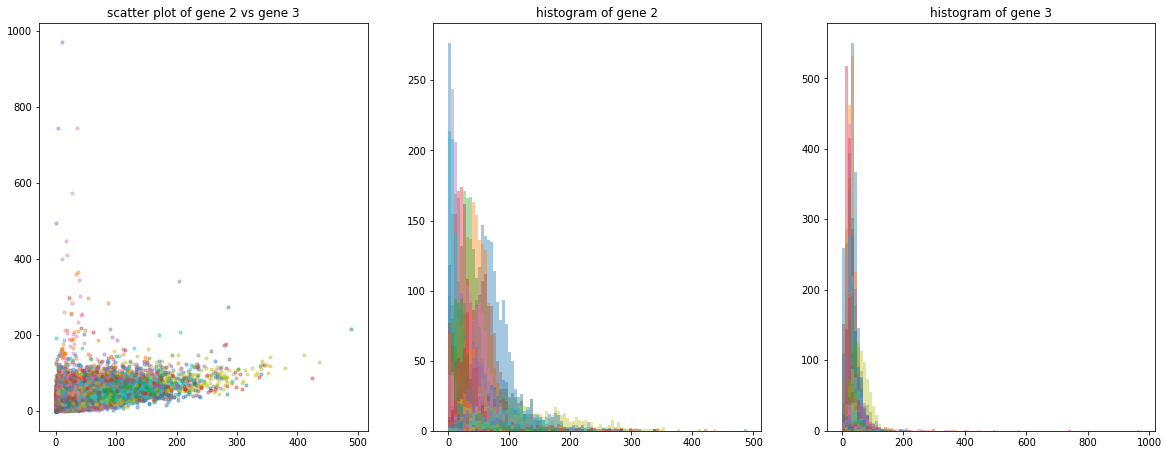

In [ ]:
print '1 million'
plot_pair(X_dense,X_label,0,1)
print 'down sampled 20k'
plot_pair(X_dense_ds,X_label_ds,0,1)
print '1 million'
plot_pair(X_dense,X_label,2,3)
print 'down sampled 20k'
plot_pair(X_dense_ds,X_label_ds,2,3)